# Linear Algebra - Week 4

In [1]:
from functools import partial
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from IPython.display import Math, display

plt.style.use("seaborn-v0_8-whitegrid")

## Eigenvalues and Eigenvectors

### Basis

> 🔑 A **basis** of a space is a set of linearly independent vectors that spans the space.

In a 1-D space, we can only have one element in the basis; in a 2-D space, we can only have two elements in the basis, and so on.

> 🔑 The **span** of a basis is the space consisting of *all* linear combinations of the basis.

Metaphorically, the span of a basis is any point in a space that can be reached by walking only in the directions defined by the basis.

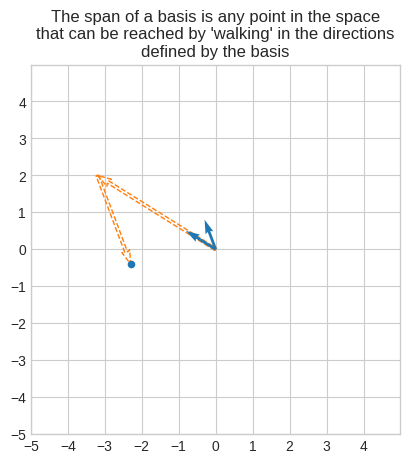

In [2]:
plt.quiver(
    [0, 4 * -0.8, 0, 0],
    [0, 4 * 0.5, 0, 0],
    [
        4 * -0.8,
        -3 * -0.3,
        -0.3,
        -0.8,
    ],
    [4 * 0.5, -3 * 0.8, 0.8, 0.5],
    angles="xy",
    fc=["none", "none", "tab:blue", "tab:blue"],
    ec=["tab:orange", "tab:orange", "none", "none"],
    ls=["dashed", "dashed", "solid", "solid"],
    linewidth=1,
    scale_units="xy",
    scale=1,
)
end_point = np.array([4 * -0.8, 4 * 0.5]) - np.array([3 * -0.3, 3 * 0.8])
plt.scatter(end_point[0], end_point[1], s=20, c="tab:blue")
plt.xticks(np.arange(-5, 5))
plt.yticks(np.arange(-5, 5))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect("equal")
plt.title(
    "The span of a basis is any point in the space\nthat can be reached by 'walking' in the directions\ndefined by the basis"
)
plt.show()

### Eigenvalues

Let's consider the following linear transformations:

$A_1 = \begin{bmatrix}2&&1\\0&&3\end{bmatrix}$

$A_2 = \begin{bmatrix}3&&0\\0&&3\end{bmatrix}$

$A_3 = \begin{bmatrix}2&&0\\0&&2\end{bmatrix}$

We can demonstrate that although $A_1$ and $A_2$ are different transformations, they are indeed the same for infinitely many points. 

And the same can be demonstrated for $A_1$ and $A_3$.

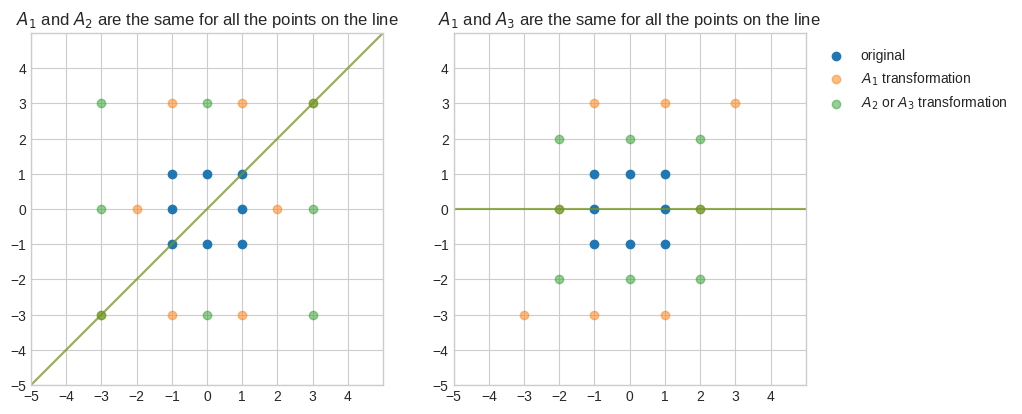

In [3]:
A1 = np.array([[2, 1], [0, 3]])
A2 = np.array([[3, 0], [0, 3]])
A3 = np.array([[2, 0], [0, 2]])
e_set = set(product([-1, 0, 1], [-1, 0, 1])) - set([(0, 0)])

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
for e in e_set:
    ax1.scatter(e[0], e[1], c="tab:blue")
    ax2.scatter(e[0], e[1], c="tab:blue")
    t_e1 = A1 @ e
    ax1.scatter(t_e1[0], t_e1[1], c="tab:orange", alpha=0.5)
    ax2.scatter(t_e1[0], t_e1[1], c="tab:orange", alpha=0.5)
    t_e2 = A2 @ e
    ax1.scatter(t_e2[0], t_e2[1], c="tab:green", alpha=0.5)
    t_e3 = A3 @ e
    ax2.scatter(t_e3[0], t_e3[1], c="tab:green", alpha=0.5)
ax1.plot([-5, 5], [-5, 5], color="tab:orange", alpha=0.5)
ax1.plot([-5, 5], [-5, 5], color="tab:green", alpha=0.5)
ax2.plot([-5, 5], [0, 0], color="tab:orange", alpha=0.5)
ax2.plot([-5, 5], [0, 0], color="tab:green", alpha=0.5)
ax1.set_xticks(np.arange(-5, 5))
ax1.set_yticks(np.arange(-5, 5))
ax2.set_xticks(np.arange(-5, 5))
ax2.set_yticks(np.arange(-5, 5))
ax1.set_xlim(-5, 5)
ax1.set_ylim(-5, 5)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)
ax1.set_aspect("equal")
ax2.set_aspect("equal")
ax1.set_title("$A_1$ and $A_2$ are the same for all the points on the line")
ax2.set_title("$A_1$ and $A_3$ are the same for all the points on the line")
plt.legend(
    ["original", "$A_1$ transformation", "$A_2$ or $A_3$ transformation"],
    bbox_to_anchor=(1.01, 0.99),
)
plt.show()

With some imagination, we can see that the blue square on the left-hand side gets sheared horizontally with $A_1$ and gets blown out with $A_2$.

We can also see that the points (1, 1) and (-1, -1) go to (3, 3) and (-3, -3) respectively with both $A_1$ and $A_2$.

Similarly, the points (1, 0) and (-1, 0) go to (2, 0) and (-2, 0) respectively with both $A_1$ and $A_3$.

We can verify that the difference between $A_1$ and $A_2$ (and $A_1$ and $A_3$) are singular transformations.

In [4]:
display(
    Math(
        "A_1 - A_2="
        + sp.latex(sp.Matrix(A1 - A2))
        + "A_1 - A_3="
        + sp.latex(sp.Matrix(A1 - A3))
    )
)
assert np.linalg.det(A1 - A2) == 0
assert np.linalg.det(A1 - A3) == 0

<IPython.core.display.Math object>

The first system of equations is singular and it has infinitely many solution all of which lie on the line $y =  x$.

$\begin{cases}-x+y=0\\0x+0y=0\end{cases} = \begin{cases}y=x\\0=0\end{cases}$

The second system of equations is also singular and it has infinitely many solutions all of which lie on the line $y = 0$.

$\begin{cases}0x+y=0\\0x+y=0\end{cases} = \begin{cases}y=0\\y=0\end{cases}$

It turns out that $A_2$ and $A_3$ have the eigenvalues 2 and 3 of the matrix $A_1$ along their diagonals.

Formally, $\lambda$ is an eigenvalue of $A_1$ if

$\begin{bmatrix}2&&1\\0&&3\end{bmatrix} - \lambda\begin{bmatrix}1&&0\\0&&1\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$

or more compactly

$\begin{bmatrix}2-\lambda&&1\\0&&3-\lambda\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$

To find the value(s) of $\lambda$ we can use the formula for the determinant, and leverage the fact that it must be zero.

$(2-\lambda) \times (3-\lambda) - 1 \times 0 = 0$

$(2-\lambda) \times (3-\lambda) = 1 \times 0$

Finally we apply the Zero-Factor Property (if the product of two factors is zero, then at least one of the factors must be zero):

$(2-\lambda) = 0 \Rightarrow \lambda = 2$

$(3-\lambda) = 0 \Rightarrow \lambda = 3$

> 🔑 $\det(A - \lambda I)$ is called the charateristic polynomial

> 🔑 The values of $\lambda$ for which the charateristic polynomial is zero are called roots of the charateristic polynomial

> 🔑 The eigenvalues are the roots of the charateristic polynomial

So basically, to find the eigenvalues of $A$ we look at the charateristic polynomial $\det(A - \lambda I)$ and find the roots, that is we solve $\det(A - \lambda I) = 0$ for $\lambda$.

### Eigenvectors

> 🔑 An eigenvector is any vector whose direction is not changed by a linear transformation and it's only stretched by the eigenvalues.

Formally, $\vec{v}$ is an eigenvector of $A$ if

$Av = \lambda v$

This can be rewritten as

$(A - \lambda I)v = 0$

Note that we express the column vector $\lambda v$ in matrix form $\lambda Iv$ when we move it to the left hand side.

Let's continue the example from the previous section and find the eigenvectors.

We basically need to find $\vec{v}$ in this system.

$\begin{bmatrix}2-\lambda&&1\\0&&3-\lambda\end{bmatrix} \begin{bmatrix}v_1\\v_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$

For $\lambda=2$ we have

$\begin{bmatrix}0&&1\\0&&1\end{bmatrix} \begin{bmatrix}v_1\\v_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$.

The coefficient matrix can be converted to the row-echelon form (after $R2 = R2 - R1$)

$\begin{bmatrix}0&&1\\0&&0\end{bmatrix} \begin{bmatrix}v_1\\v_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$

to obtain the following system of equations

$\begin{cases}v_2=0\\0=0\end{cases}$

which has solution $\vec{v} = \langle1, 0\rangle$ or any multiple.

For $\lambda=3$ we have

$\begin{bmatrix}-1&&1\\0&&0\end{bmatrix} \begin{bmatrix}v_1\\v_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$,

which is already in row-echelon form, so we only need to solve the following system of equations

$\begin{cases}-v_1+v_2=0\\0=0\end{cases}$

$\begin{cases}v_2=v_1\\0=0\end{cases}$

to find the solution is $\vec{v} = \langle1, 1\rangle$ or any multiple.

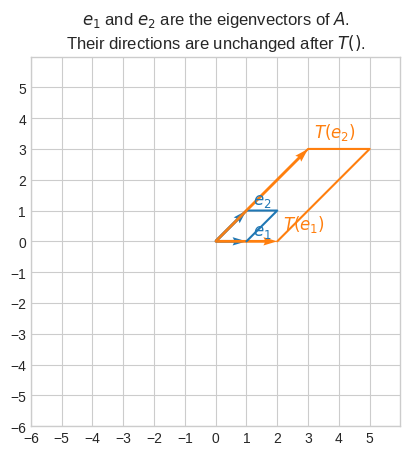

In [5]:
def plot_transformation(T, title, ax, basis=None, lim=5):
    if basis is None:
        e1 = np.array([[1], [0]])
        e2 = np.array([[0], [1]])
    else:
        e1, e2 = basis
    zero = np.zeros(1, dtype="int")
    c = "tab:blue"
    c_t = "tab:orange"
    ax.set_xticks(np.arange(-lim, lim))
    ax.set_yticks(np.arange(-lim, lim))
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    _plot_vectors(e1, e2, c, ax)
    ax.plot(
        [zero, e2[0], e1[0] + e2[0], e1[0]],
        [zero, e2[1], e1[1] + e2[1], e1[1]],
        color=c,
    )
    _make_labels(e1, "$e_1$", c, y_offset=(-0.2, 1.0), ax=ax)
    _make_labels(e2, "$e_2$", c, y_offset=(-0.2, 1.0), ax=ax)
    e1_t = T(e1)
    e2_t = T(e2)
    _plot_vectors(e1_t, e2_t, c_t, ax)
    ax.plot(
        [zero, e2_t[0], e1_t[0] + e2_t[0], e1_t[0]],
        [zero, e2_t[1], e1_t[1] + e2_t[1], e1_t[1]],
        color=c_t,
    )
    _make_labels(e1_t, "$T(e_1)$", c_t, y_offset=(0.0, 1.0), ax=ax)
    _make_labels(e2_t, "$T(e_2)$", c_t, y_offset=(0.0, 1.0), ax=ax)
    ax.set_aspect("equal")
    ax.set_title(title)


def _make_labels(e, text, color, y_offset, ax):
    e_sgn = 0.4 * np.array([[1] if i == 0 else i for i in np.sign(e)])
    return ax.text(
        e[0] - 0.2 + e_sgn[0],
        e[1] + y_offset[0] + y_offset[1] * e_sgn[1],
        text,
        fontsize=12,
        color=color,
    )


def _plot_vectors(e1, e2, color, ax):
    ax.quiver(
        [0, 0],
        [0, 0],
        [e1[0], e2[0]],
        [e1[1], e2[1]],
        color=color,
        angles="xy",
        scale_units="xy",
        scale=1,
    )


def T(A, v):
    w = A @ v
    return w


A = np.array([[2, 1], [0, 3]])
evecs = [np.array([[1], [0]]), np.array([[1], [1]])]
lambdas = [2, 3]

for lam, evc in zip(lambdas, evecs):
    assert np.array_equal((A - lam * np.identity(2)) @ evc, np.zeros((2, 1)))
    assert np.array_equal(A @ evc, lam * evc)

fig, ax = plt.subplots()
plot_transformation(
    partial(T, A),
    title="$e_1$ and $e_2$ are the eigenvectors of $A$.\nTheir directions are unchanged after $T()$.",
    ax=ax,
    basis=evecs,
    lim=6,
)

Let's consider another matrix.

$A = \begin{bmatrix}9&&4\\4&&3\end{bmatrix}$

To find the eigenvalues we solve

$(9-\lambda)(3-\lambda)-16=0$

$\lambda^2-12\lambda+27-16=0$

$(1-\lambda)(11-\lambda)=0$

So the eigenvalues are $\lambda=1$ and $\lambda=11$.

For $\lambda=1$ the eigenvector is given by

$\begin{bmatrix}8&&4\\4&&2\end{bmatrix} \begin{bmatrix}v_1\\v_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$.

The coefficient matrix can be converted to the row-echelon form (after $R1 = 0.125R1$, $R2 = 0.25R2$, $R2 = R2 - R1$)

$\begin{bmatrix}1&&0.5\\0&&0\end{bmatrix} \begin{bmatrix}v_1\\v_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$

to obtain the following system of equations

$\begin{cases}v_1+0.5v_2=0\\0=0\end{cases}$

$\begin{cases}v_1=-0.5v_2\\0=0\end{cases}$

which has solution $\vec{v} = \langle-0.5, 1\rangle$ or any multiple.

For $\lambda = 11$ the eigenvector is given by

$\begin{bmatrix}-2&&4\\4&&-8\end{bmatrix} \begin{bmatrix}v_1\\v_2\end{bmatrix}  = \begin{bmatrix}0\\0\end{bmatrix}$.

The coefficient matrix can be converted to the row-echelon form (after $R1=-0.5R1$, $R2=-0.5R2$ and $R2 = R2 - R1$)

$\begin{bmatrix}1&&-2\\0&&0\end{bmatrix} \begin{bmatrix}v_1\\v_2\end{bmatrix}  = \begin{bmatrix}0\\0\end{bmatrix}$

to obtain the following system of equations

$\begin{cases}v_1-2v_2=0\\0=0\end{cases}$

$\begin{cases}v_1=2v_2\\0=0\end{cases}$

which has solution $\vec{v} = \langle2, 1\rangle$ or any multiple.

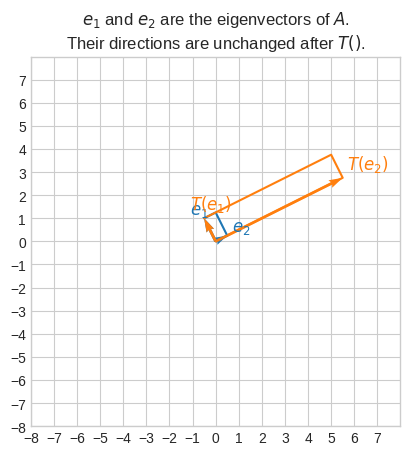

In [6]:
A = np.array([[9, 4], [4, 3]])
lambdas = [1, 11]
evecs = [np.array([[-0.5], [1]]), np.array([[0.5], [0.25]])]

for lam, evc in zip(lambdas, evecs):
    assert np.array_equal((A - lam * np.identity(2)) @ evc, np.zeros((2, 1)))
    assert np.array_equal(A @ evc, lam * evc)

fig, ax = plt.subplots()
plot_transformation(
    partial(T, A),
    title="$e_1$ and $e_2$ are the eigenvectors of $A$.\nTheir directions are unchanged after $T()$.",
    ax=ax,
    basis=evecs,
    lim=8,
)